In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.constants as sc
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '120825'

In [41]:
k = np.linspace(0, 2*np.pi, 40)


In [42]:
n

0

In [43]:
#n+=1
da=7
db=0
dc=da
na=0
nb=0
nc=na
alpha=0.7


In [44]:
n+=1
Tarr = np.linspace(0,3,20)
ds = np.zeros((3,1), dtype=complex)
ns = np.zeros((3,1), dtype=complex)
for t in Tarr:
    print(t)
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=2, UB=2, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
    vals = mM.Deltra(k, T=t, HF=False, Nmax=100, Nmin=10, alpha=alpha)
    ds = np.concatenate((ds, vals[0][:,-1].reshape(3,1)), axis=1)



0.0
0.15789473684210525
0.3157894736842105
0.47368421052631576
0.631578947368421
0.7894736842105263
0.9473684210526315
1.1052631578947367
1.263157894736842
1.4210526315789473
1.5789473684210527
1.7368421052631577
1.894736842105263
2.052631578947368
2.2105263157894735
2.3684210526315788
2.526315789473684
2.6842105263157894
2.8421052631578947
3.0


In [45]:
ds

array([[ 0.00000000e+00+0.j,  5.50347782e-01+0.j,  5.02284999e-01+0.j,
         4.99535840e-01+0.j,  4.99583232e-01+0.j,  4.92381559e-01+0.j,
         4.77405713e-01+0.j,  4.51564664e-01+0.j,  4.01528951e-01+0.j,
         3.38770856e-01+0.j,  2.53304097e-01+0.j,  1.27918474e-01+0.j,
         7.99865448e-02+0.j,  3.34339895e-02+0.j,  1.30588080e-02+0.j,
         6.42950566e-03+0.j, -1.39512209e-03+0.j, -6.83430150e-03+0.j,
         8.30901837e-03+0.j, -5.25994238e-03+0.j, -1.20921604e-03+0.j],
       [ 0.00000000e+00+0.j,  1.00097581e-01+0.j,  9.59713475e-02+0.j,
         9.67020643e-02+0.j,  9.56791200e-02+0.j,  9.44552403e-02+0.j,
         9.00464341e-02+0.j,  8.47244450e-02+0.j,  7.91006506e-02+0.j,
         6.59254348e-02+0.j,  4.81551906e-02+0.j,  2.41725096e-02+0.j,
         6.60594236e-03+0.j, -8.61766947e-04+0.j,  5.74478476e-05+0.j,
        -7.01342246e-04+0.j, -1.82837355e-04+0.j,  1.23326117e-03+0.j,
        -1.38240484e-03+0.j,  1.11204260e-03+0.j,  6.32429344e-04+0.j],
    

In [46]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\temp\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {da, db, dc}, nA, nB, nC={na, nb, nc}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n Temperature={Tarr}\n dels: {ds}\nnus: {ns}")
    file.close

c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\atsch\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


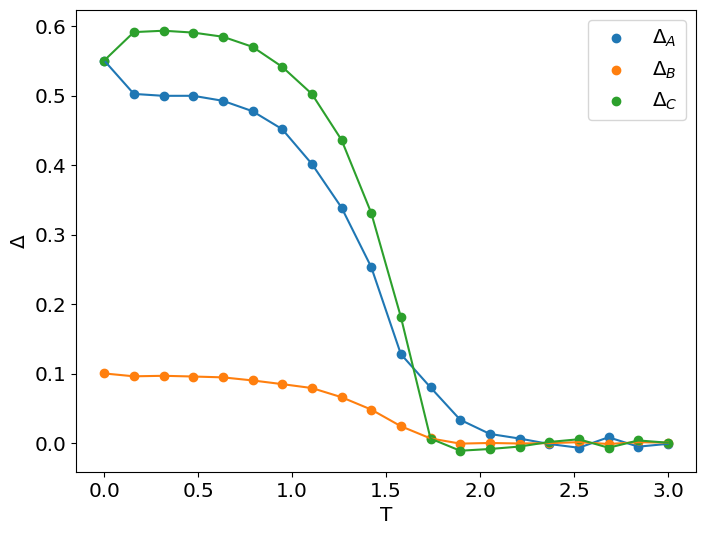

In [51]:
plt.figure(figsize=(8,6))
plt.xlabel('T', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

labels=[r'$\Delta_A$', r'$\Delta_B$', r'$\Delta_C$']
for i in range(3):
    plt.scatter(Tarr,ds[i,1:], label=labels[i])
    plt.plot(Tarr,ds[i,1:])

plt.legend(fontsize='x-large')
plt.savefig(newpath +"\\Temp.png")
plt.show()

In [52]:
sd = np.sum(ds, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


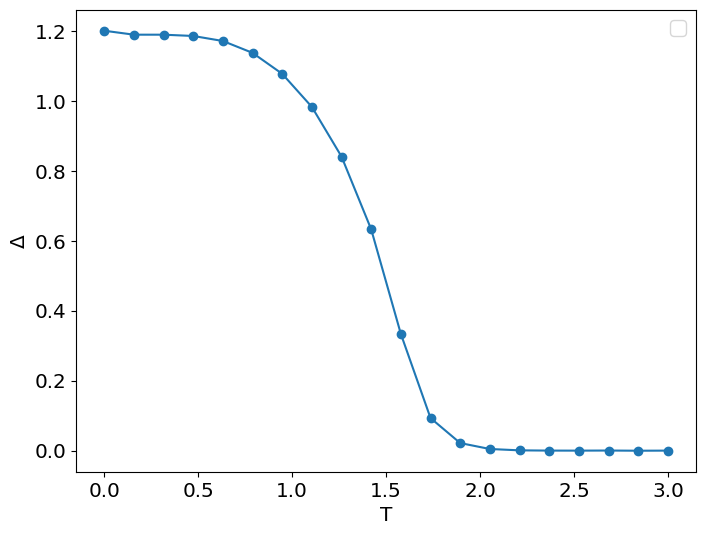

In [53]:
plt.figure(figsize=(8,6))
plt.xlabel('T', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

plt.scatter(Tarr,sd[1:])
plt.plot(Tarr,sd[1:])

plt.legend(fontsize='x-large')
plt.savefig(newpath +"\\Temp_summed.png")
plt.show()